In [1]:
import pandas as pd
df = pd.read_csv('fraudTrain.csv')

In [2]:
#We put every import here so we don't write the same line of code in different cells
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [3]:
#First checking for duplicate and null values:

print(df[df.duplicated() == True])
#as we can see here, we have no duplicated rows

print(df.isnull().sum())
#as we can see here, we have no null value inside any column

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [4]:
print(df.dtypes)
#intiially, checking the types of our columns

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


C:\Users\dell\AppData\Local\Temp\ipykernel_17976\185819566.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df.corr()


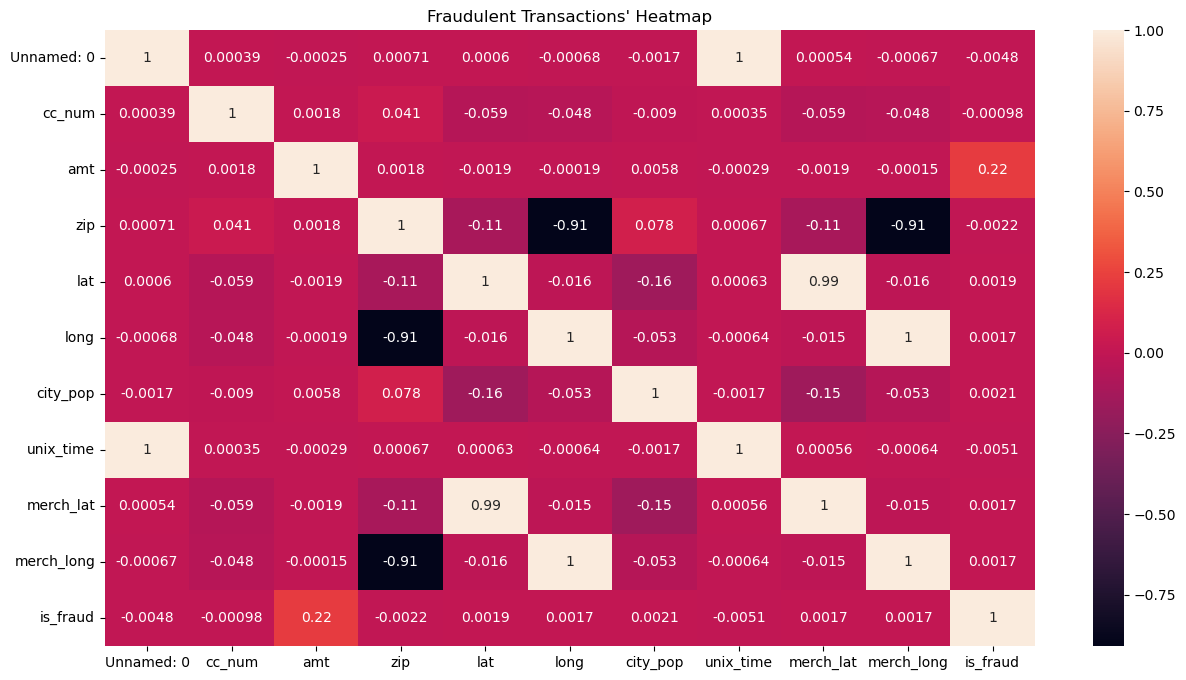

In [5]:
#this part is for seeing correlations. (intial heatmap, so we can compare with end result heatmap later)

df_test = df.corr() 
plt.figure(figsize=(15, 8))
sns.heatmap(df_test, annot=True)
plt.title("Fraudulent Transactions' Heatmap")
plt.show()

In [6]:
#Statistical Analysis and Data visualization below this: 

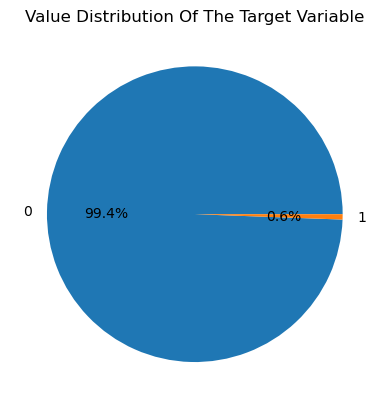

In [7]:
data = df['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Target Variable")
plt.show()

#Here, we know that we are dealing with an imbalanced dataset.

In [8]:
#Summary statistics for the entire dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
#This one is for the non fraud transactions only 
print('Summary statistics of non-fraudulent transactions:')
non_fraud_dataSet = df[df['is_fraud'] == 0]
non_fraud_dataSet.describe()


Summary statistics of non-fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1289169.0
mean,6.484732e+05,4.172901e+17,6.766711e+01,4.880511e+04,3.853689e+01,-9.022814e+01,8.877523e+04,1.349249e+09,3.853666e+01,-9.022827e+01,0.0
std,3.741526e+05,1.308990e+18,1.540080e+02,2.689099e+04,5.075234e+00,1.375598e+01,3.018065e+05,1.283514e+07,5.109144e+00,1.376794e+01,0.0
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.0
25%,3.246100e+05,1.800429e+14,9.610000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338759e+09,3.473145e+01,-9.689853e+01,0.0
50%,6.484110e+05,3.521417e+15,4.728000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349254e+09,3.936528e+01,-8.744091e+01,0.0
75%,9.723990e+05,4.642255e+15,8.254000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359378e+09,4.195705e+01,-8.023853e+01,0.0
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.568990e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.668291e+01,-6.695090e+01,0.0


In [10]:
#This one is for the fraud transactions only
print('Summary statistics of fraudulent transactions:')
fraud_dataSet = df[df['is_fraud'] == 1]
fraud_dataSet.describe()


Summary statistics of fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.0
mean,6.249497e+05,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,9.727676e+04,1.348389e+09,38.653901,-89.915808,1.0
std,4.010560e+05,1.276871e+18,390.560070,27265.558212,5.172289,14.278221,3.265815e+05,1.383020e+07,5.218387,14.298685,0.0
min,2.449000e+03,6.041621e+10,1.060000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.425114,-166.550779,1.0
25%,2.398565e+05,1.800429e+14,245.662500,24927.000000,35.056100,-96.701000,7.465000e+02,1.335744e+09,35.114671,-96.671038,1.0
50%,6.381620e+05,3.528041e+15,396.505000,46290.000000,39.433600,-86.691900,2.623000e+03,1.348872e+09,39.427008,-86.813044,1.0
75%,9.849215e+05,4.651007e+15,900.875000,71107.000000,42.073175,-79.941600,2.143700e+04,1.360021e+09,41.986902,-79.907096,1.0
max,1.295733e+06,4.992346e+18,1376.040000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371787e+09,67.510267,-67.569238,1.0


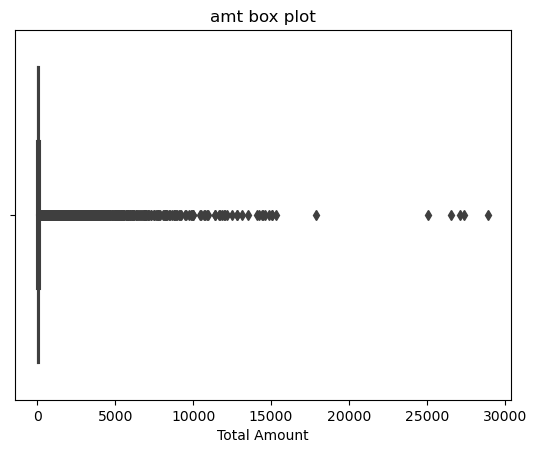

In [11]:

sns.boxplot(x = df['amt'])
plt.title('amt box plot')
plt.xlabel('Total Amount')
plt.show()

#This box plot shows that the amt values have outliers however, the summary descriptions above this box plot show that...
#...the mean of the amount column is way higher when fraudulent transactions are made so...
#... we can know these can be inherent characteristics of fraudulent transactions


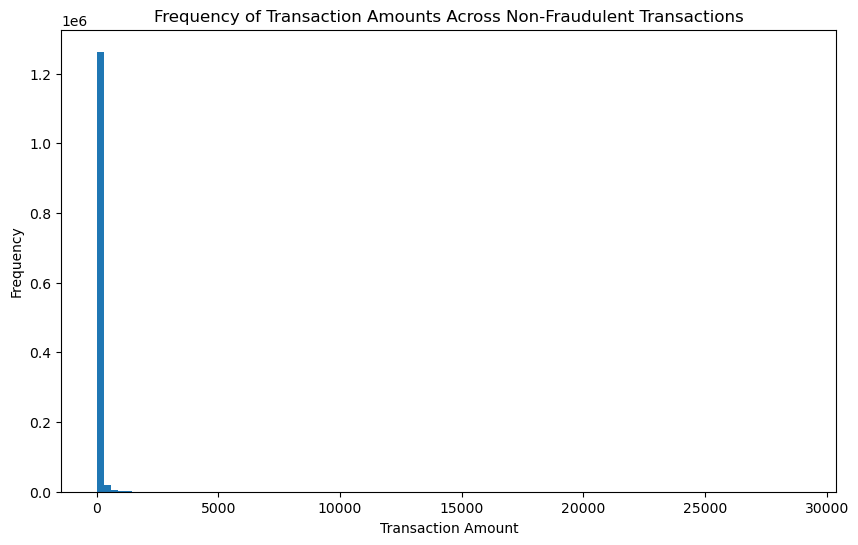

In [12]:

non_fraud_dataSet = df[df.is_fraud == 0]
data = non_fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#This graph shows that the vast majority of non-fraudulent transactions are clustered around small amounts,... 
#...close to 0. The frequency drops as the transaction amount increases.

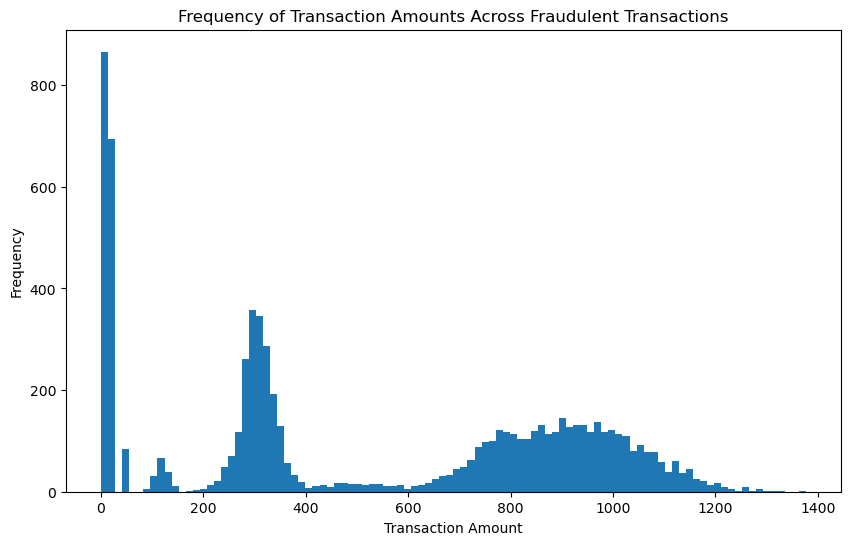

In [13]:

fraud_dataSet = df[df.is_fraud == 1]
data = fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# This graph shows that while the highest frequency of fraudulent transactions is also at amounts close to 0,...
#...there is a wider distribution of transaction amounts with noticeable frequencies between 200 and 1200.

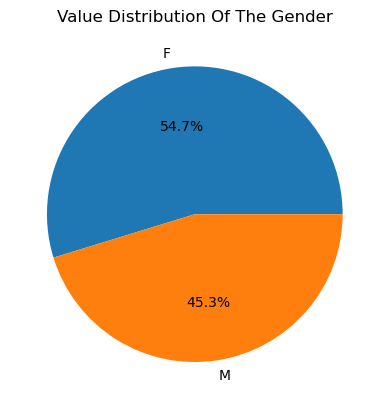

<Figure size 1000x600 with 0 Axes>

In [14]:
data = df['gender'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Gender")
plt.figure(figsize=(10, 6))
plt.show()

#Here, we can observe that the value distribution of gender are almost equal.

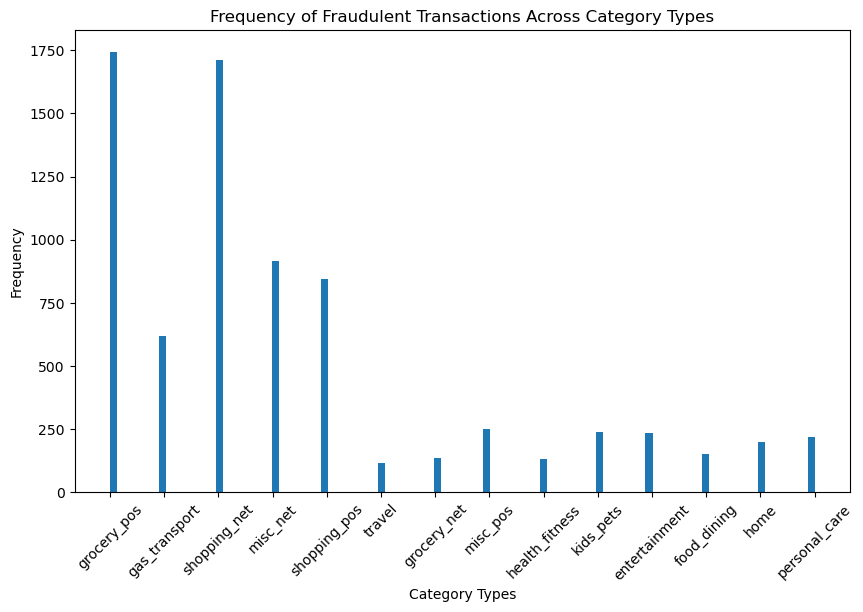

In [15]:

fraud_dataSet = df[df['is_fraud'] == 1]

data = fraud_dataSet['category']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Category Types')
plt.xlabel('Category Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

#As we can observe, the categories that were mostly used for fraudulent transactions are: grocery_pos and shopping_net

In [16]:
#Feature Selection/Extraction: 

df['trans_date_trans_time']= df['trans_date_trans_time'].str[10:13]
#taking only the hour time from this format: 'M/D/YYYY  HH:MM:SS AM/PM'

df = df.rename(columns={'trans_date_trans_time': 'trans_hour'})

print(df['trans_hour'].unique()) 

[' 00' ' 01' ' 02' ' 03' ' 04' ' 05' ' 06' ' 07' ' 08' ' 09' ' 10' ' 11'
 ' 12' ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23']


In [17]:

df = df.drop(columns=['cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'city_pop','job', 'trans_num', 'unix_time' ])  


In [18]:
df['lat'] = abs(df['lat'] - df['merch_lat'])
df['long'] = abs(df['long'] - df['merch_long'])

df = df.rename(columns = {'long': 'long_distance', 'lat': 'lat_distance'})

df = df.drop(columns=['merch_lat'])
df = df.drop(columns=['merch_long'])


In [19]:
df['dob'] = df['dob'].str[0:4] 
#taking only the birth year from this format: 'M/D/YYYY' so we can get the age of the card holder

df['dob'] = df['dob'].astype(int) 
#turning the column to integer values so we can get the age(performing a column type transformation)

df['dob'] = 2020 - df['dob'] #because the dataset has transacions up until no more than 2020
df = df.rename(columns={'dob': 'age'})


In [20]:
#Printing entire the dataframe after feature Selection/Extraction:
print(df.head())

   Unnamed: 0 trans_hour       category     amt gender  lat_distance  \
0           0         00       misc_net    4.97      F      0.067507   
1           1         00    grocery_pos  107.23      F      0.271247   
2           2         00  entertainment  220.11      M      0.969904   
3           3         00  gas_transport   45.00      M      0.803731   
4           4         00       misc_pos   41.96      M      0.254299   

   long_distance  age  is_fraud  
0       0.870215   32         0  
1       0.024038   42         0  
2       0.107519   58         0  
3       0.447271   53         0  
4       0.830441   34         0  


In [21]:
#This part is for encoding: 
print('number of different hours: ', len(df['trans_hour'].unique()), '==>',df['trans_hour'].unique() )
#Now we can use label encoding on the trans_hour column

le=LabelEncoder()
df['trans_hour'] = le.fit_transform(df['trans_hour'])
#we then renamed the column to trans_hour


number of different hours:  24 ==> [' 00' ' 01' ' 02' ' 03' ' 04' ' 05' ' 06' ' 07' ' 08' ' 09' ' 10' ' 11'
 ' 12' ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23']


In [22]:
print('number of different categories: ', len(df['category'].unique()))
#Performing binary encoding on the 'category' column
encoder = ce.BinaryEncoder(cols=['category'])

df_binary=encoder.fit_transform(df['category'])

df = pd.concat([df, df_binary], axis=1) #this line is to add the new encoded columns inside the dataframe

df = df.drop(columns=['category'])#dropping the main category column after adding the new encoded columns inside df

number of different categories:  14


In [23]:
print('number of different genders: ', len(df['gender'].unique()), '==>', df['gender'].unique() )
#Now we can use one hot encoding on the gender column 

df = pd.get_dummies(df, columns=['gender'], prefix = 'gender')


number of different genders:  2 ==> ['F' 'M']


In [24]:
#checking the types of all the columns after done with feature selection/extraction, encoding, etc...
print(df.dtypes)
print(df.head())

Unnamed: 0         int64
trans_hour         int32
amt              float64
lat_distance     float64
long_distance    float64
age                int32
is_fraud           int64
category_0         int64
category_1         int64
category_2         int64
category_3         int64
gender_F           uint8
gender_M           uint8
dtype: object
   Unnamed: 0  trans_hour     amt  lat_distance  long_distance  age  is_fraud  \
0           0           0    4.97      0.067507       0.870215   32         0   
1           1           0  107.23      0.271247       0.024038   42         0   
2           2           0  220.11      0.969904       0.107519   58         0   
3           3           0   45.00      0.803731       0.447271   53         0   
4           4           0   41.96      0.254299       0.830441   34         0   

   category_0  category_1  category_2  category_3  gender_F  gender_M  
0           0           0           0           1         1         0  
1           0           0     

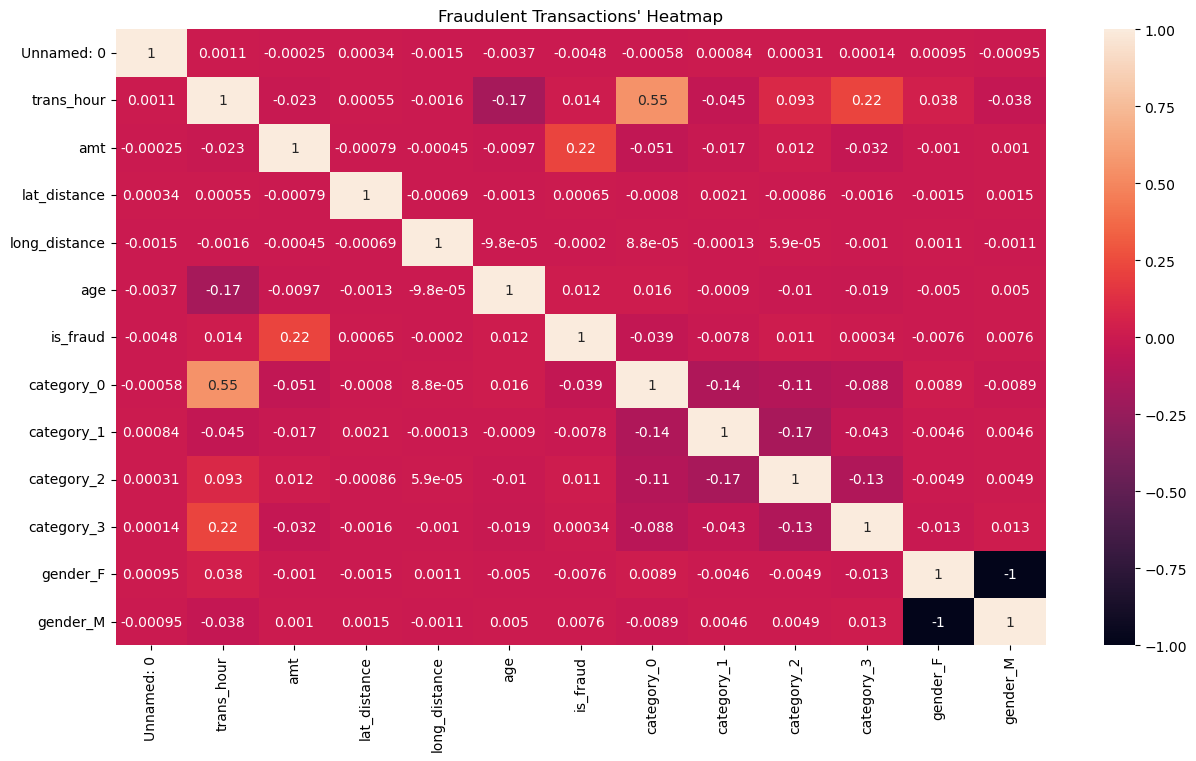

In [25]:
#this part is for seeing correlations. (Checking heatmap after being done with everything)

df_test = df.corr() 
plt.figure(figsize=(15, 8))
sns.heatmap(df_test, annot=True)
plt.title("Fraudulent Transactions' Heatmap")
plt.show()

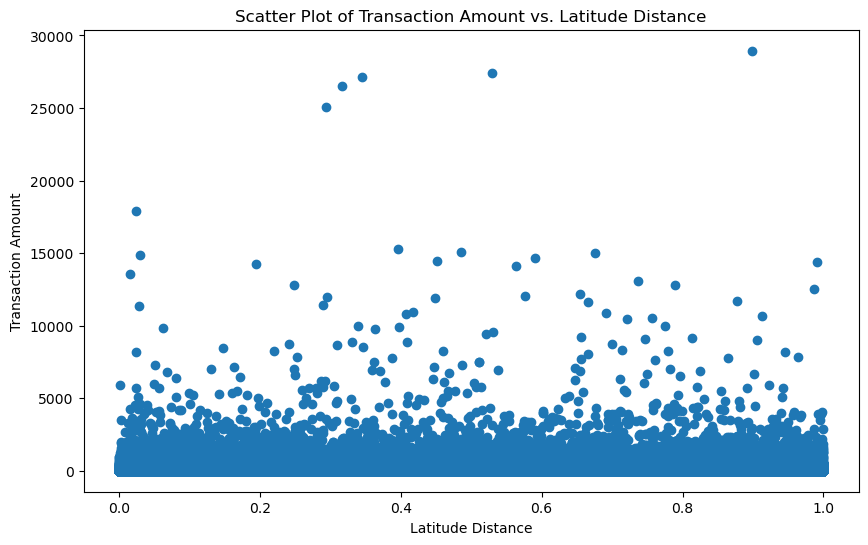

In [26]:
#Some additional Data visualizations: (That were added during the final phase of the project)

plt.figure(figsize=(10, 6))
plt.scatter(df['lat_distance'], df['amt'])
plt.title('Scatter Plot of Transaction Amount vs. Latitude Distance')
plt.xlabel('Latitude Distance')
plt.ylabel('Transaction Amount')
plt.show()

#The scatter plot displays a cluster of data points mostly concentrated at the lower end of the transaction amount axis,... 
#...suggesting that smaller transactions are more common regardless of latitude distance.

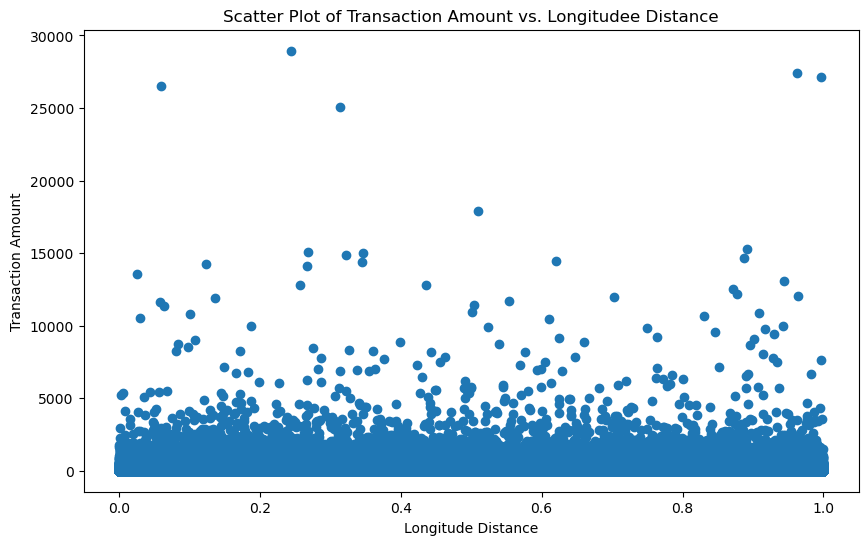

In [27]:

plt.figure(figsize=(10, 6))
plt.scatter(df['long_distance'], df['amt'])
plt.title('Scatter Plot of Transaction Amount vs. Longitudee Distance')
plt.xlabel('Longitude Distance')
plt.ylabel('Transaction Amount')
plt.show()

#For this one, we can say that it is the same as above but now smaller transactions are more common regardless of their...
#...longitude distance

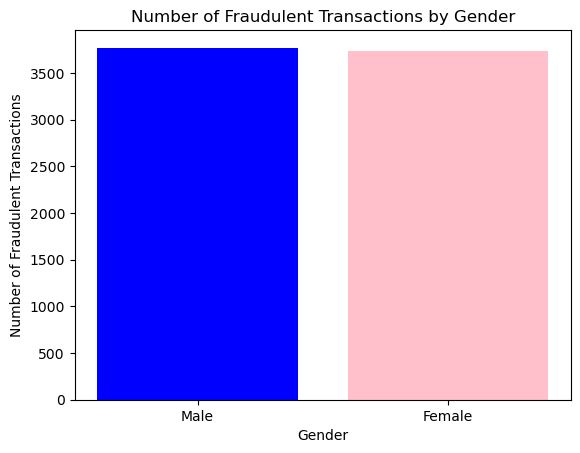

In [28]:
#Fraudulent transcations with respect to gender

maleFraud = df[(df['gender_M'] == 1) & (df['is_fraud'] == 1)]
maleFraud_count = df[(df['gender_M'] == 1) & (df['is_fraud'] == 1)]['is_fraud'].sum()

femaleFraud = df[(df['gender_F'] == 1) & (df['is_fraud'] == 1)]
femaleFraud_count = df[(df['gender_F'] == 1) & (df['is_fraud'] == 1)]['is_fraud'].sum()

gender = ['Male', 'Female']
fraud_counts = [maleFraud_count, femaleFraud_count]

plt.bar(gender, fraud_counts, color=['blue', 'pink'])
plt.title('Number of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

#The bar chart illustrates the number of fraudulent transactions by gender, ... 
#...showing that the counts for males and females are fairly similar, with a slightly higher number for one gender.

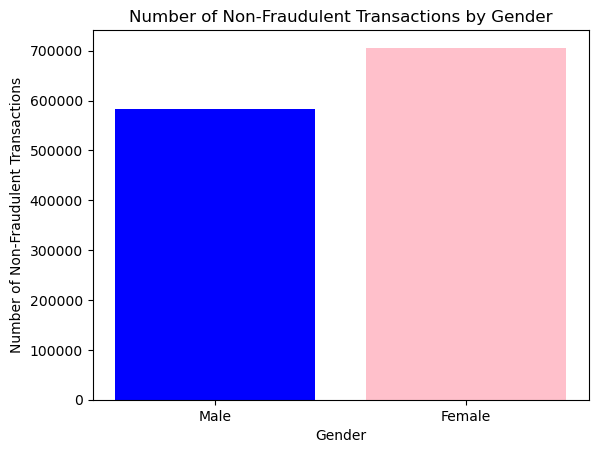

In [29]:
#non-Fraudulent transcations with respect to gender

#Include only non-fraudulent transactions
non_fraudulent_transactions = df[df['is_fraud'] == 0]

male_non_fraud_count = non_fraudulent_transactions[non_fraudulent_transactions['gender_M'] == 1]['is_fraud'].count()
female_non_fraud_count = non_fraudulent_transactions[non_fraudulent_transactions['gender_F'] == 1]['is_fraud'].count()

gender = ['Male', 'Female']
non_fraud_counts = [male_non_fraud_count, female_non_fraud_count]

plt.bar(gender, non_fraud_counts, color=['blue', 'pink'])
plt.title('Number of Non-Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.show()

#The bar chart illustrates the number of non-fraudulent transactions by gender, ... 
#...showing that the count  for one gender is significantly greater than the other one.

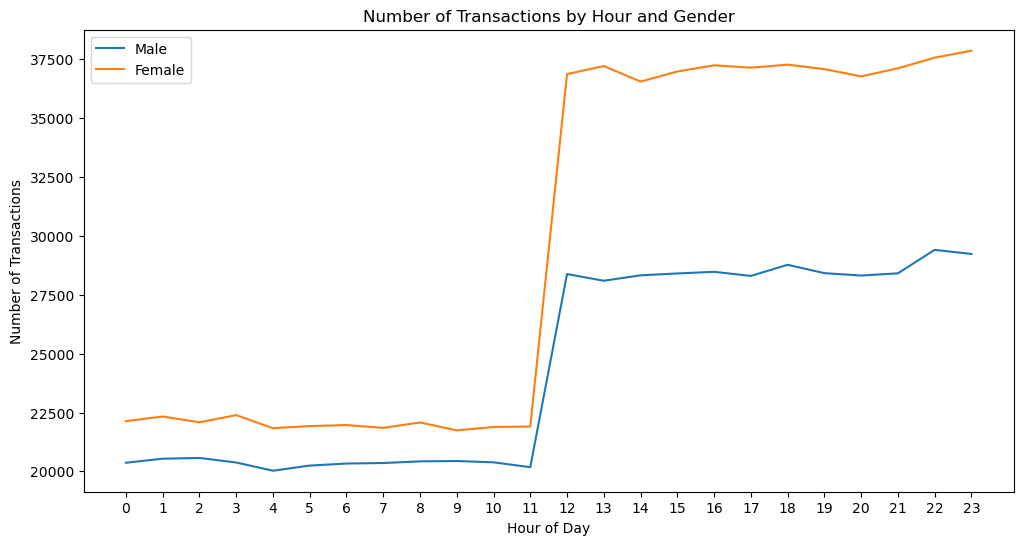

In [30]:
#The hours of all transactions with respect to gender

hourly_transactions_male = df[df['gender_M'] == 1].groupby('trans_hour').size()
hourly_transactions_female = df[df['gender_F'] == 1].groupby('trans_hour').size()


plt.figure(figsize=(12, 6))
plt.plot(hourly_transactions_male.index, hourly_transactions_male.values, label='Male')
plt.plot(hourly_transactions_female.index, hourly_transactions_female.values, label='Female')


plt.title('Number of Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # because we have a 24hr format

plt.legend() #added on the top left, for making visualization easier

plt.show()

#showing that for one gender, transactions sharply increase at a specific hour and remain consistently high,...
#...while for the other gender, transactions increase more gradually over time. 

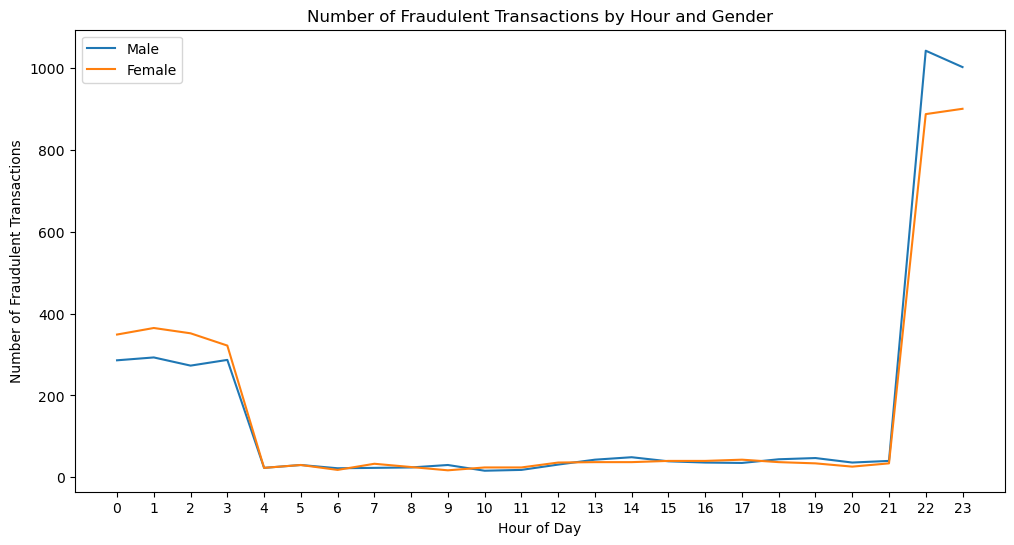

In [31]:
#The hours of ONLY fraudulent transactions with respect to gender

#Filtering to only fraudulent trasactions
fraud_df = df[df['is_fraud'] == 1]

hourly_fraud_male = fraud_df[fraud_df['gender_M'] == 1].groupby('trans_hour').size()
hourly_fraud_female = fraud_df[fraud_df['gender_F'] == 1].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_fraud_male.index, hourly_fraud_male.values, label='Male')
plt.plot(hourly_fraud_female.index, hourly_fraud_female.values, label='Female')

plt.title('Number of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))  # because we have a 24 hr format
plt.legend()

plt.show()

#The line graph depicts a trend in fraudulent transactions by gender across different hours, ...
#... with both genders showing a spike in fraud at the end of the day. 

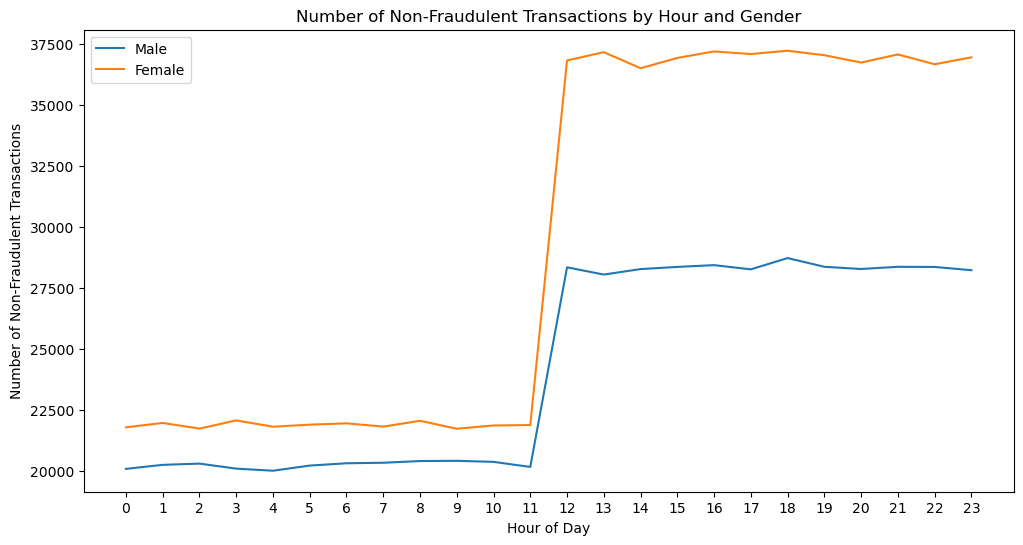

In [32]:
#The hours of ONLY non-fraudulent transactions with respect to gender

#Filtering to only non-fraudulent transactions
non_fraud_df = df[df['is_fraud'] == 0]

hourly_non_fraud_male = non_fraud_df[non_fraud_df['gender_M'] == 1].groupby('trans_hour').size()
hourly_non_fraud_female = non_fraud_df[non_fraud_df['gender_F'] == 1].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_non_fraud_male.index, hourly_non_fraud_male.values, label='Male')
plt.plot(hourly_non_fraud_female.index, hourly_non_fraud_female.values, label='Female')

plt.title('Number of Non-Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(range(0, 24))  #because we have a 24 hour format
plt.legend()

plt.show()

#There's a sharp increase in activity for one gender during the early hours, after which the transaction volume remains... 
#...relatively steady,while the other gender exhibits a more gradual increase and overtakes in volume at the end of the day.

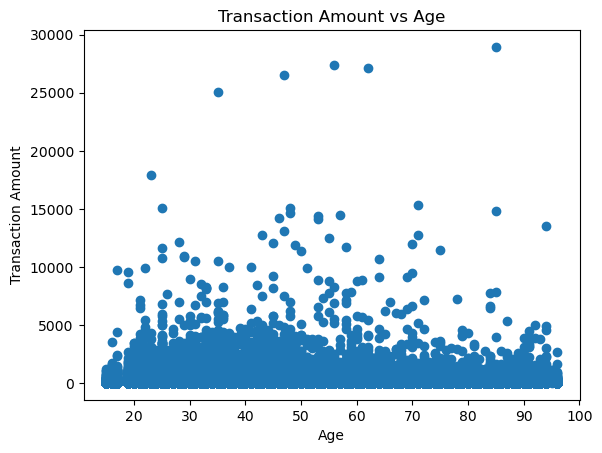

In [33]:
#Relationship between (transaction amount of every purchase) and (age)

plt.scatter(df['age'], df['amt'])
plt.title('Transaction Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()

# The majority of transactions appear to be clustered at lower transaction amounts, ...
#...irrespective of age, with a few outliers representing higher transaction amounts. 

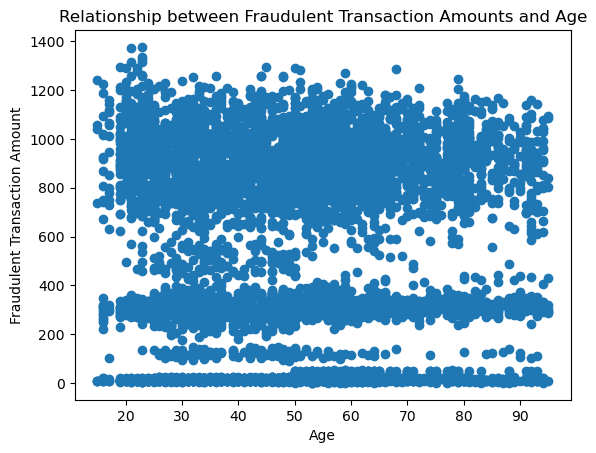

In [34]:
#Relationship between (fraudulent transaction amounts of every purchase) and (age)

#Including only fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

plt.scatter(fraudulent_transactions['age'], fraudulent_transactions['amt'])
plt.title('Relationship between Fraudulent Transaction Amounts and Age')
plt.xlabel('Age')
plt.ylabel('Fraudulent Transaction Amount')
plt.show()

#The scatter plot primarily illustrates that fraudulent transactions are predominantly lower in amount,...
#...with the bulk of data points clustered near the bottom of the graph. This trend is consistent across all age groups. 

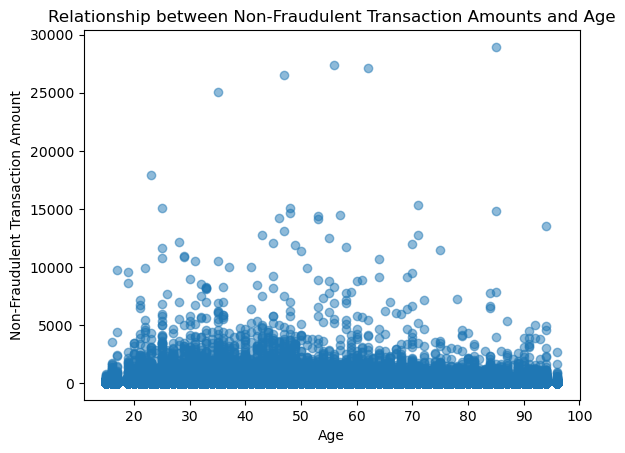

In [35]:
#Relationship between (non-fraudulent transaction amounts of every purchase) and (age)

#Including only non-fraudulent transactions
non_fraudulent_transactions = df[df['is_fraud'] == 0]

plt.scatter(non_fraudulent_transactions['age'], non_fraudulent_transactions['amt'], alpha=0.5)
plt.title('Relationship between Non-Fraudulent Transaction Amounts and Age')
plt.xlabel('Age')
plt.ylabel('Non-Fraudulent Transaction Amount')
plt.show()

#The majority of transactions are concentrated at the lower end of the transaction amount spectrum, with a dense clustering...
#of points near the bottom of the graph, indicating that non-fraudulent transactions are typically of smaller amounts across all age groups. 

In [36]:
#below this are the graphs for data visualization (that are used in the reports),... 
#...they are used after feature selection/extraction, encoding, etc...

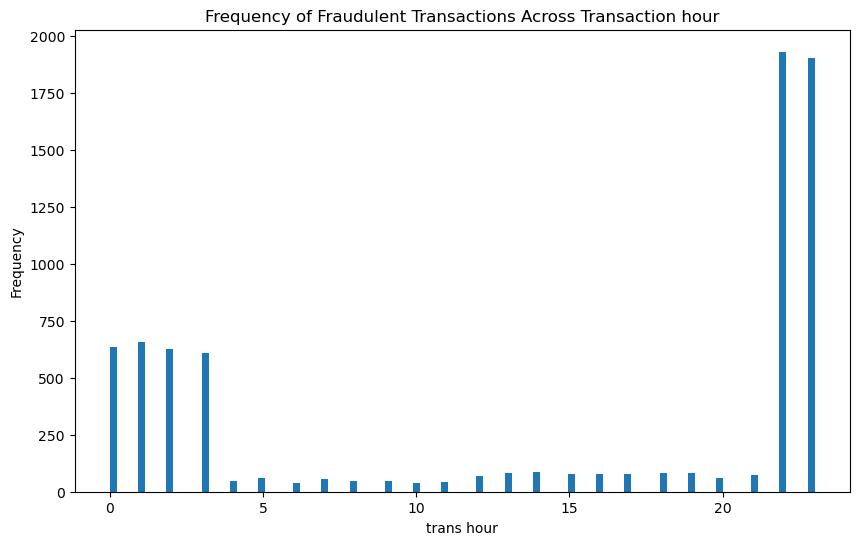

In [37]:
fraud_dataSet = df[df['is_fraud'] == 1]
data = fraud_dataSet['trans_hour']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Transaction hour')
plt.xlabel('trans hour')
plt.ylabel('Frequency')
plt.show()
#we observe that most of the fraudulent transactions done are during 10PM (22) and 11PM(23).

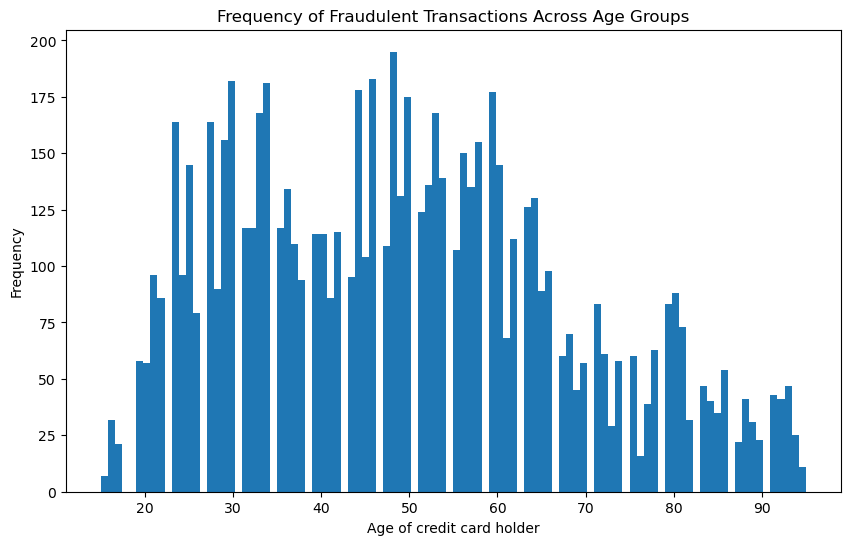

In [38]:
fraud_dataSet = df[df.is_fraud == 1]
data = fraud_dataSet['age']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Age Groups')
plt.xlabel('Age of credit card holder')
plt.ylabel('Frequency')
plt.show()
#we observe that indviduals within the ages of 30-60 have the most fraudulent transactions.

In [39]:
#Phase 2 Feedback: Many more data visualizations were added before the starting the final phase of the project:
#The Final Phase of the project starts here:
#(First we be made functions that were used for plotting and training)

In [46]:
#Got this code from the internet so we can visualize the AUC_ROC curve:
#We made a function for this one so we don't have to rewrite it for every model.

def Plot_Auc_Roc_Curve(X_test, y_test):
    """This function is for Visualizing the AUC-ROC curve"""
    # Calculate ROC curve and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [41]:
#This function is for calculating our evaluation metrics
#This function was made so we dont rewrite this entire code for every model

def calculate_evaluation_metrics(y_true, y_pred):
    """This function is for calculating our evaluation metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc_roc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, auc_roc

In [42]:
#This function is for printing the values of all our evaluation metrics
#This function was made so we dont rewrite this entire code for every model

def print_evaluation_metrics(accuracy, precision, recall, f1, auc_roc):
    """This function is for printing the values of all our evaluation metrics"""
    print('Test Accuracy:', accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1 Score:', f1)
    print('Test AUC ROC:', auc_roc)

In [43]:
#This function is for putting all the evaluation metrics on a chart after training each model
#This function was made so we dont rewrite this entire code for every model

def evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc):
    
    """This function is for putting all the evaluation metrics on a chart after training each model"""
    #Evaluation metrics and their corresponding values
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC ROC"]
    values = [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc]

    # Create a vertical bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color='skyblue')
    plt.ylabel('Values')
    plt.xlabel('Evaluation Metrics')
    plt.title('Model Evaluation Metrics')

    # Display the values on top of the bars
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45)  # Rotate the metric names for better readability

    plt.tight_layout()
    plt.show()

In [65]:
def show_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
#The model trainings and visualizations of metrics start under this cell.

In [59]:
#Logistic Regression on the full dataset here:

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9937301254746107
Test Precision: 0.5212713292561358
Test Recall: 0.5019655628363985
Test F1 Score: 0.502494255228135
Test AUC ROC: 0.5019655628363985
time:  7.296188592910767


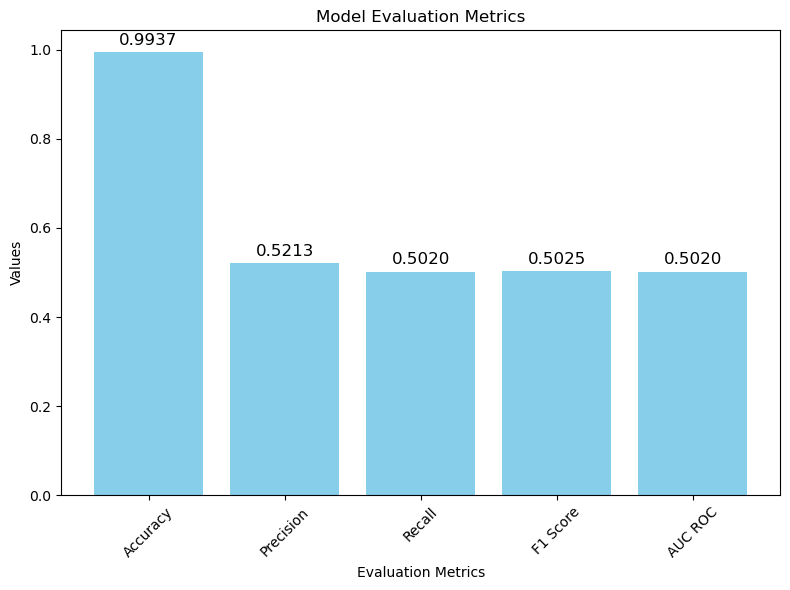

In [60]:
#The comparison of the evaluation metrics for logistic regression on the full dataset.
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

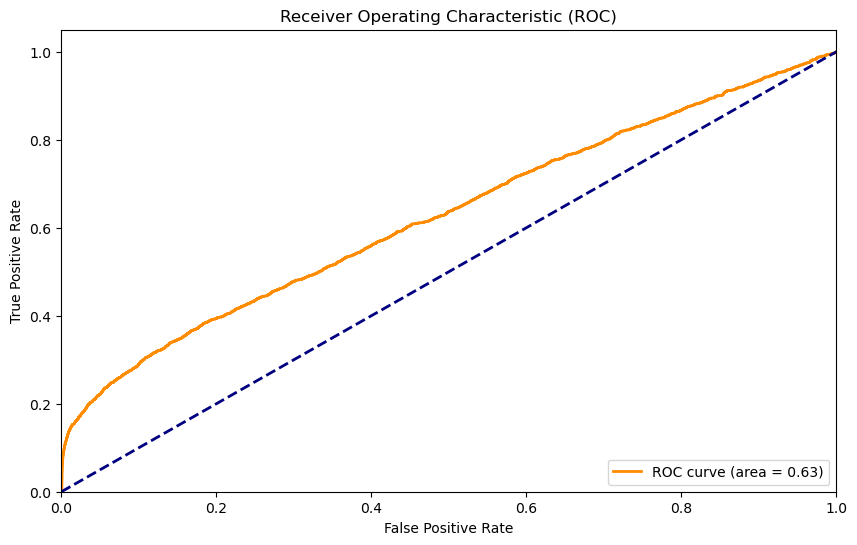

In [61]:
#The AUC ROC curve of logistic regression on the full dataset.
Plot_Auc_Roc_Curve(X_test, y_test)

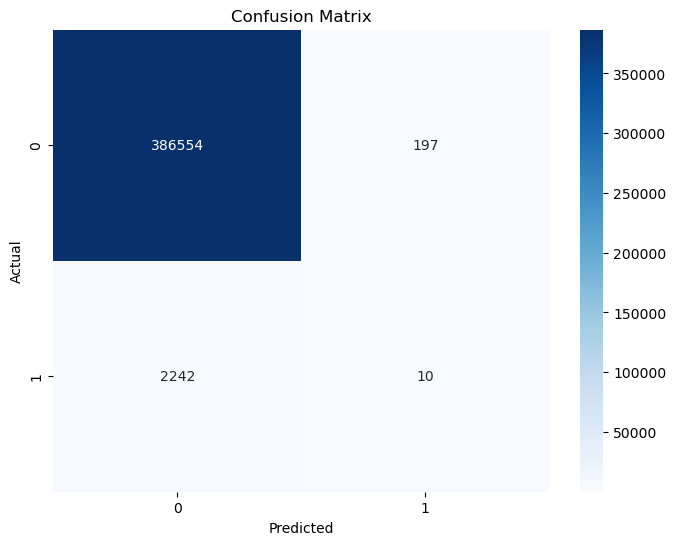

In [66]:
show_confusion_matrix(y_test, y_test_pred)

In [67]:
#Logistic Regression on the split dataset (7.5k fraud and 7.5k random non-fraud)

fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]
# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506)

new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42) #test_size=0.2, random_state=2
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)


Test Accuracy: 0.8441385435168739
Test Precision: 0.8540070359227996
Test Recall: 0.8441385435168739
Test F1 Score: 0.8430447007243614
Test AUC ROC: 0.8441385435168739
time:  0.09059906005859375


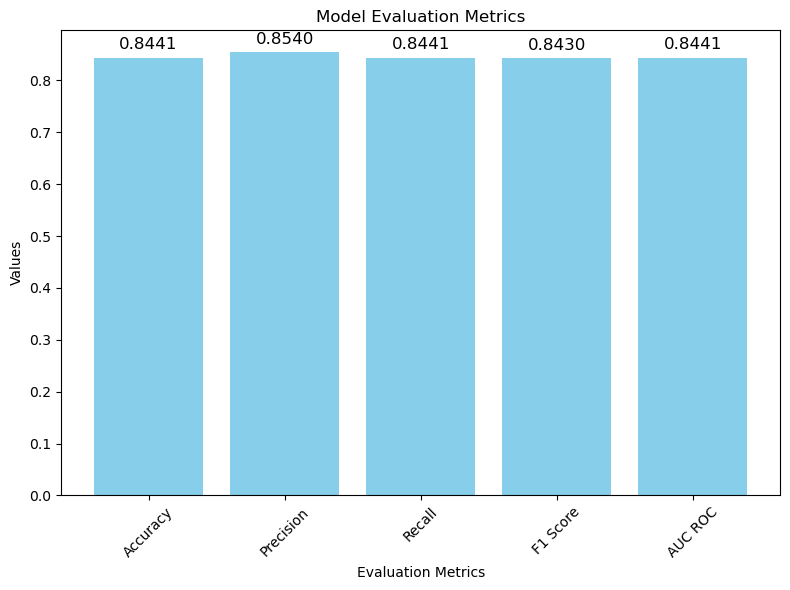

In [68]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

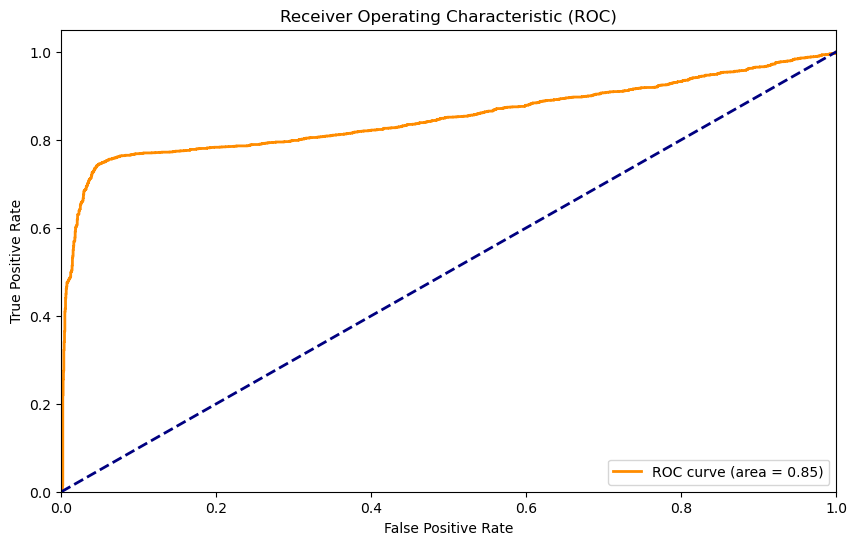

In [69]:
Plot_Auc_Roc_Curve(X_test, y_test)

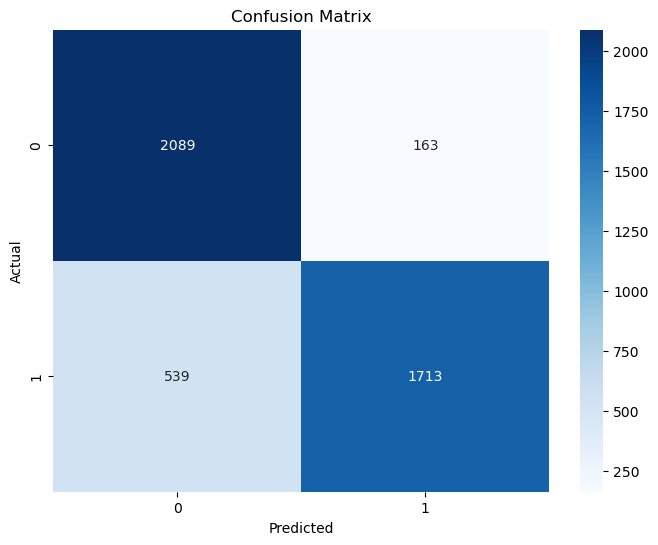

In [70]:
show_confusion_matrix(y_test, y_test_pred)

In [71]:
#Decision tree on the full dataset:

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9954833253213986
Test Precision: 0.8871916310373085
Test Recall: 0.6533865219838231
Test F1 Score: 0.7191782566686453
Test AUC ROC: 0.6533865219838231
time:  6.432328701019287


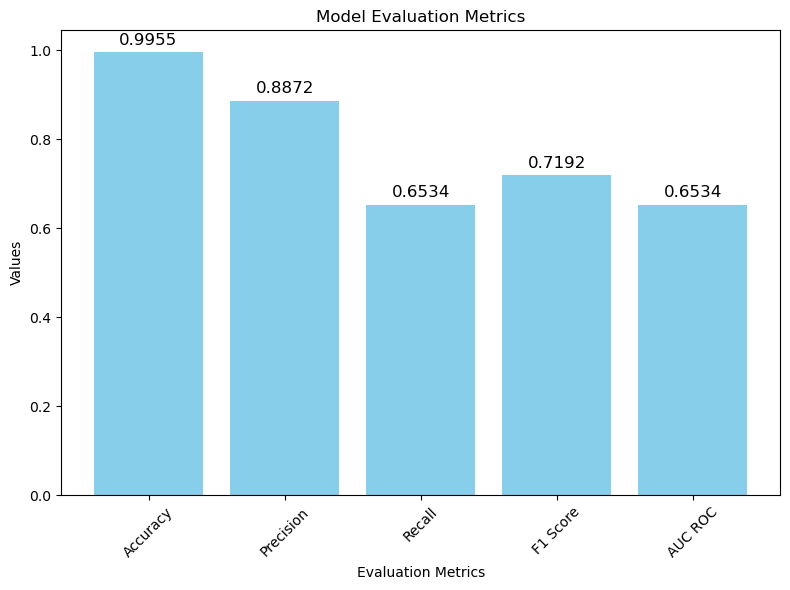

In [72]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

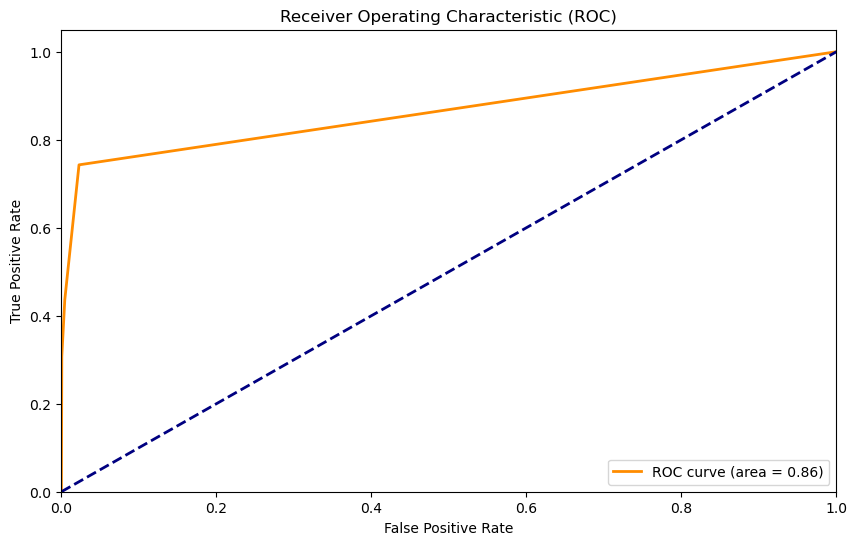

In [73]:
Plot_Auc_Roc_Curve(X_test, y_test)

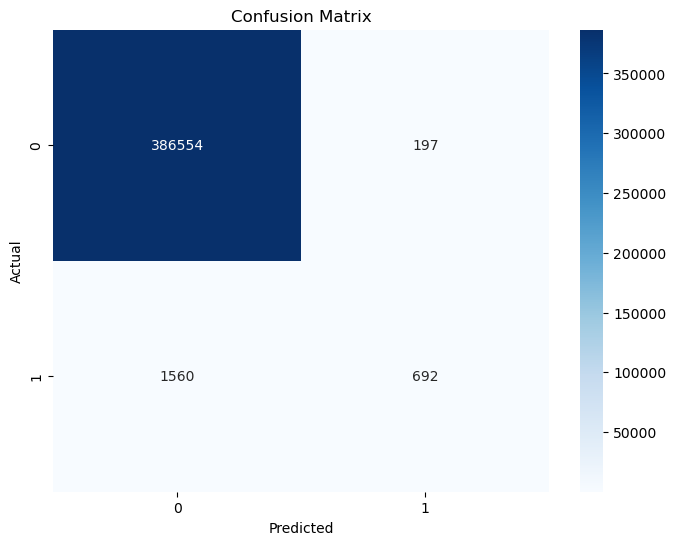

In [74]:
show_confusion_matrix(y_test, y_test_pred)

In [75]:
#Decision tree on the split dataset (7.5k fraud and 7.5k random non-fraud): 
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506)

new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.8670071047957372
Test Precision: 0.8840950217700443
Test Recall: 0.8670071047957371
Test F1 Score: 0.8655112953680713
Test AUC ROC: 0.8670071047957371
time:  0.08099579811096191


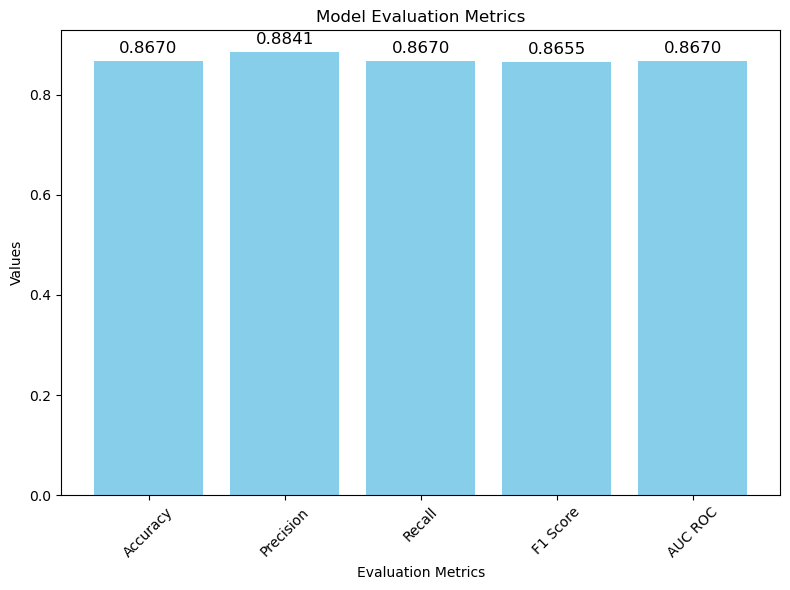

In [76]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

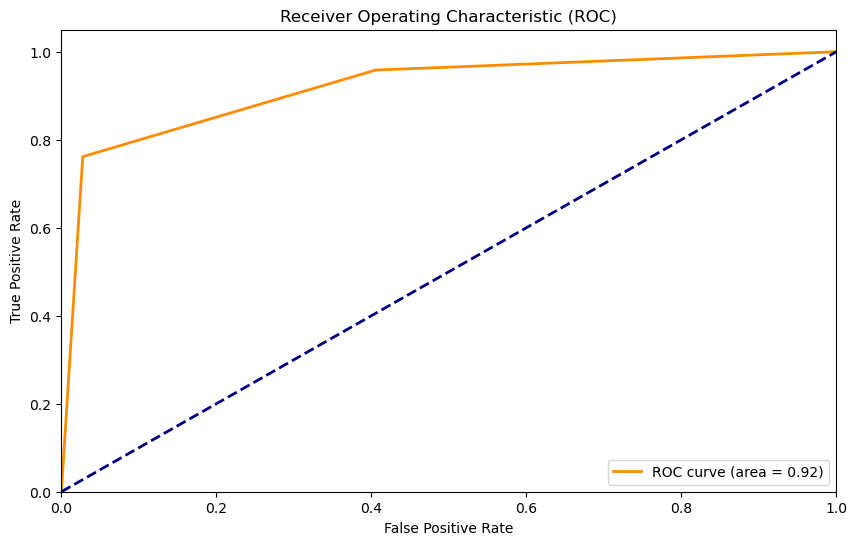

In [77]:
Plot_Auc_Roc_Curve(X_test, y_test)

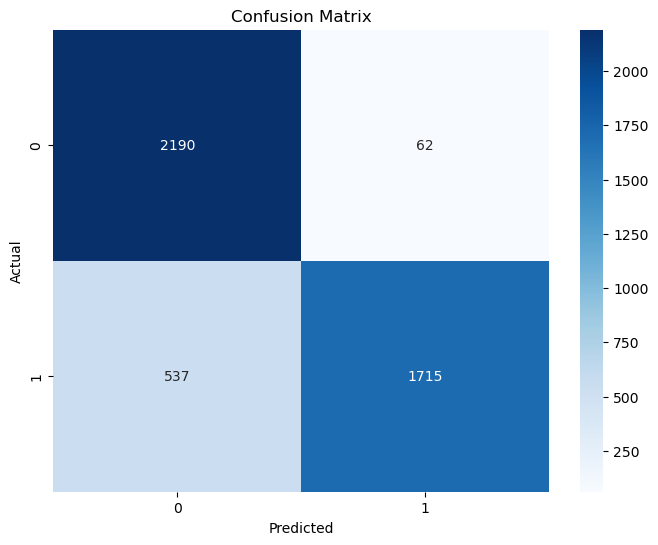

In [78]:
show_confusion_matrix(y_test, y_test_pred)

In [91]:
#Random forest on the full dataset here:

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
#The best parametes here were found by hyperparameter tuning which is below the random forest model: 
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9986041238756513
Test Precision: 0.9819616962500961
Test Recall: 0.8935673482352617
Test F1 Score: 0.9332515349490289
Test AUC ROC: 0.8935673482352617
time:  1789.9041814804077


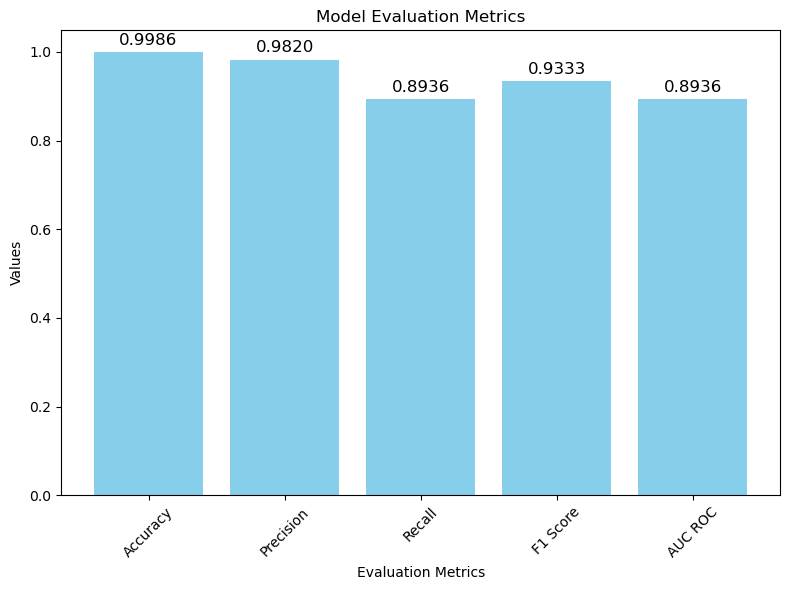

In [92]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

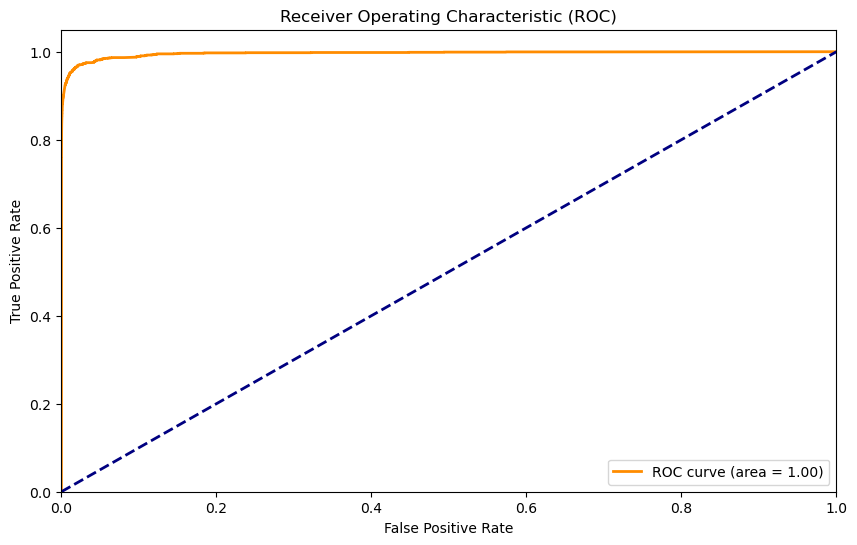

In [93]:
Plot_Auc_Roc_Curve(X_test, y_test)

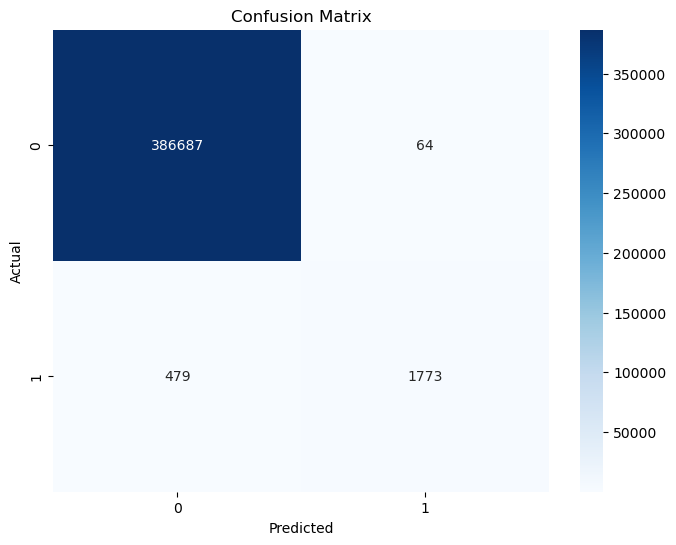

In [94]:
show_confusion_matrix(y_test, y_test_pred)

In [96]:
#Random Forest on the split dataset (7.5k fraud and 7.5k random non-fraud): 

fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
#The best parametes here were found by hyperparameter tuning which is below the random forest model: 
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)


Test Accuracy: 0.9771314387211367
Test Precision: 0.9771390593922061
Test Recall: 0.9771314387211367
Test F1 Score: 0.9771313474089314
Test AUC ROC: 0.9771314387211367
time:  14.418400049209595


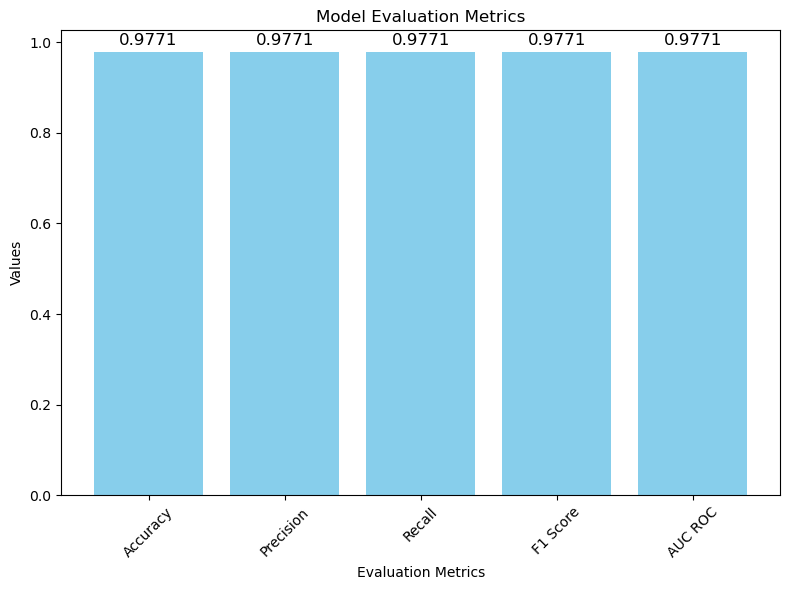

In [97]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

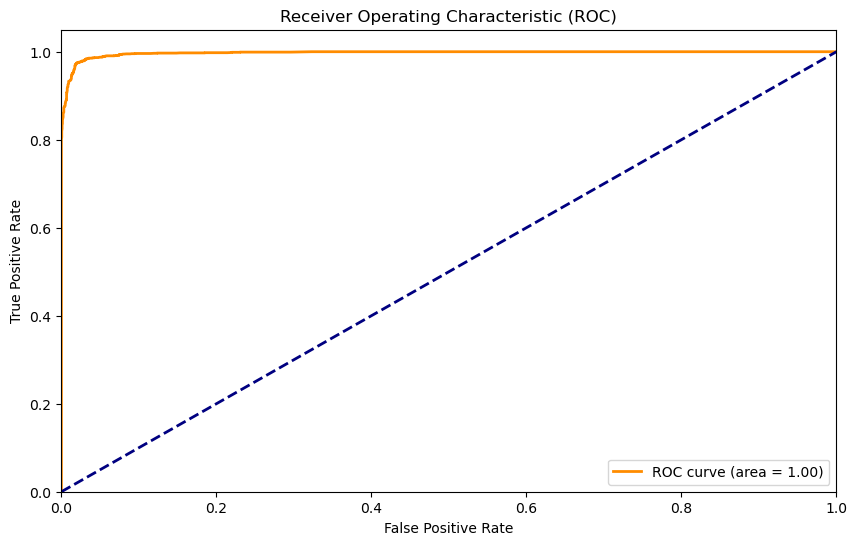

In [98]:
Plot_Auc_Roc_Curve(X_test, y_test)

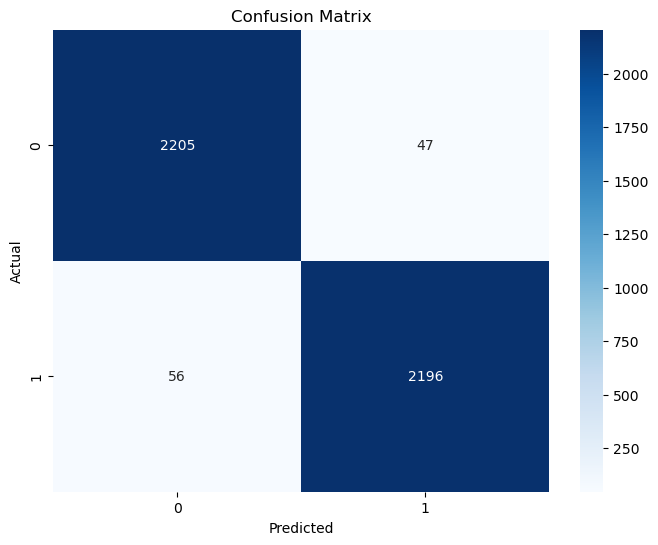

In [99]:
show_confusion_matrix(y_test, y_test_pred)

In [132]:
#Hyper parameter tuning on random forest for the split dataset (7.5k fraud and 7.5k random non-fraud): 
Start_Time = time()

param_grid = {
'n_estimators': [1,10, 100, 200, 300],
 'max_depth': [2, 4, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': range(1,10)
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)
best_rf = grid_search.best_estimator_
# Check performance on the test set

End_Time = time()

accuracy = best_rf.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy of the best model: {accuracy}")
print('time: ', End_Time-Start_Time)

#2025 is the number of times the algorithm is runnning

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy found:  0.9698328250257223
Test set accuracy of the best model: 0.9784635879218473
time:  546.9431538581848


In [79]:
#KNN on the full dataset here:

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)


Test Accuracy: 0.994915206309463
Test Precision: 0.7952572429215746
Test Recall: 0.6912874522747373
Test F1 Score: 0.7320021098945921
Test AUC ROC: 0.6912874522747373
time:  39.20182824134827


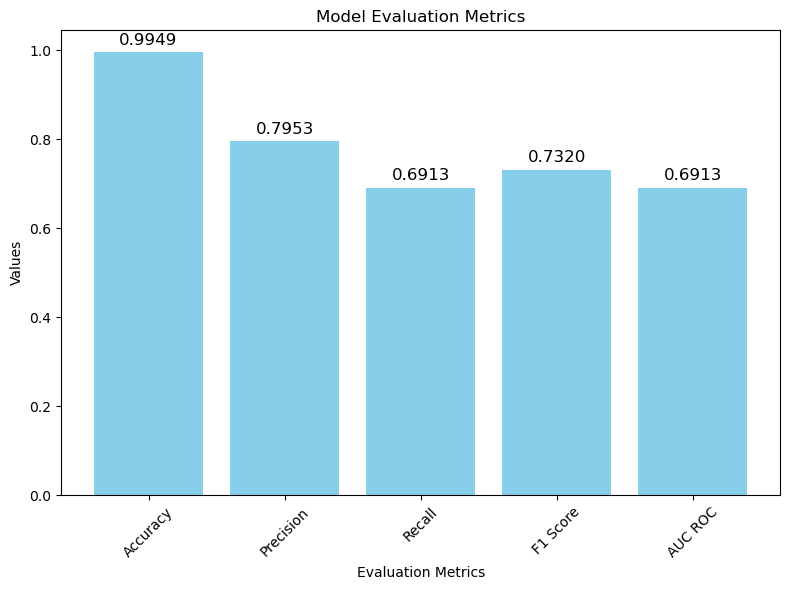

In [80]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

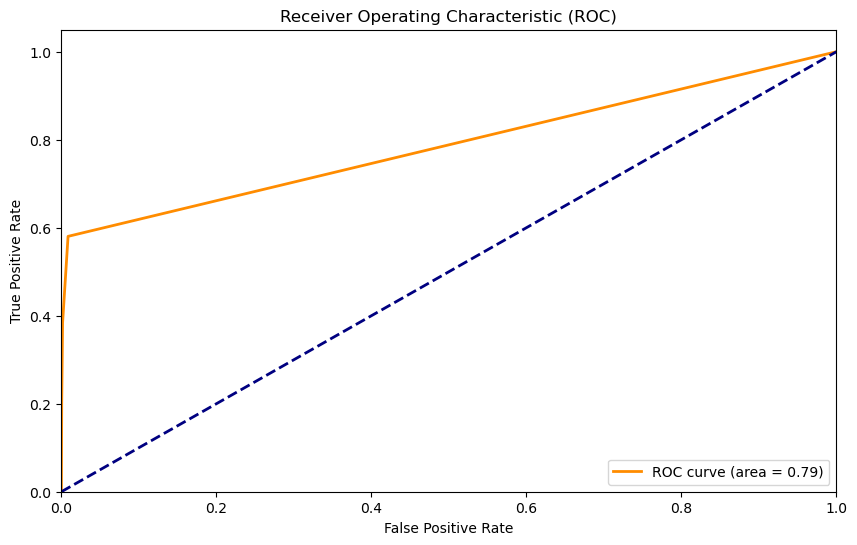

In [81]:
Plot_Auc_Roc_Curve(X_test, y_test)

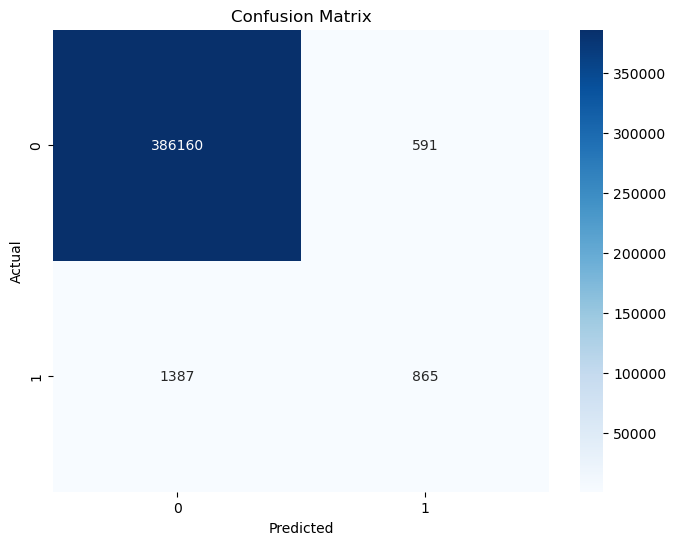

In [82]:
show_confusion_matrix(y_test, y_test_pred)

In [83]:
#KNN on the split dataset (7.5k fraud and 7.5k random non-fraud): 
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.8134991119005328
Test Precision: 0.8151705742051711
Test Recall: 0.8134991119005328
Test F1 Score: 0.8132515133924869
Test AUC ROC: 0.8134991119005328
time:  0.33361268043518066


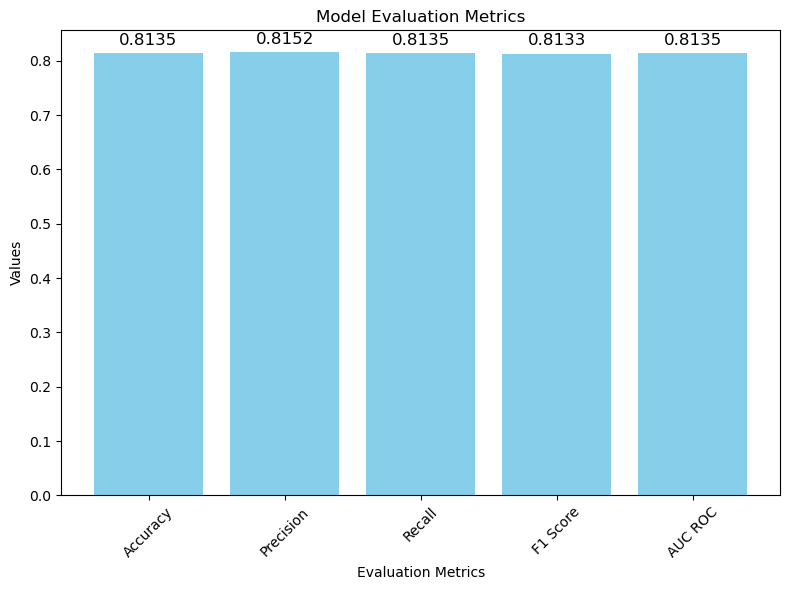

In [84]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

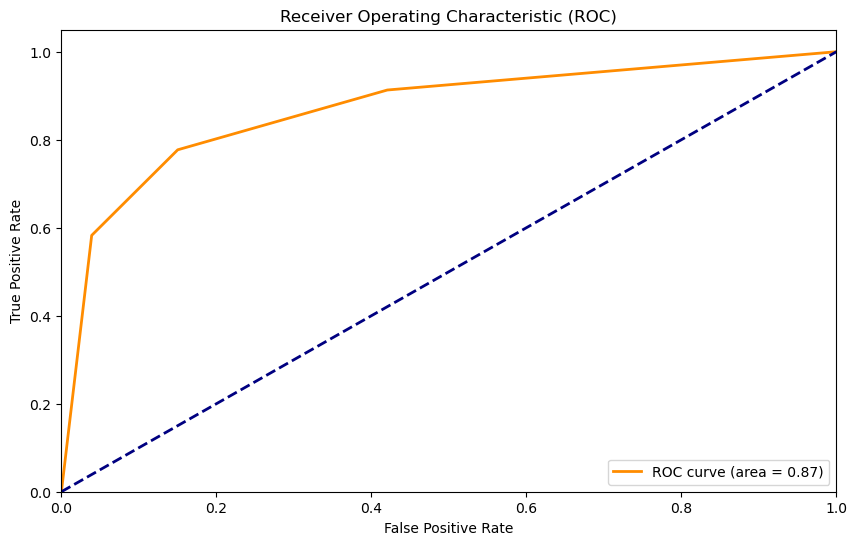

In [85]:
Plot_Auc_Roc_Curve(X_test, y_test)

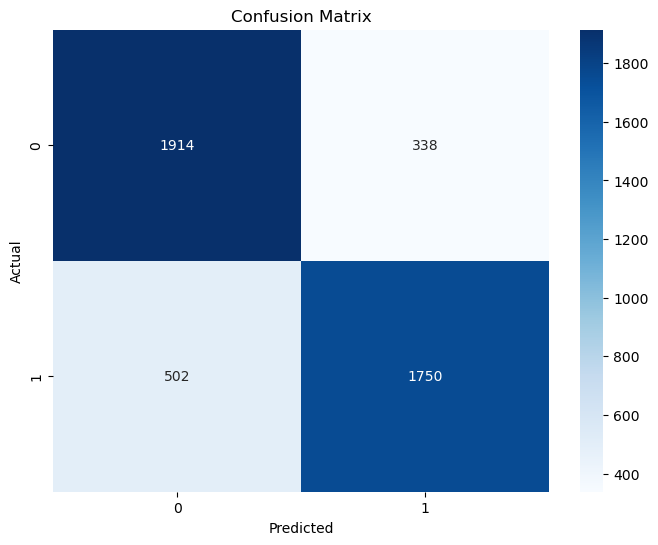

In [86]:
show_confusion_matrix(y_test, y_test_pred)

In [87]:
#Naïve Bayes on the full dataset here: (Done on full dataset only as we were getting the exact same evaluation metric values... 
#...for both full dataset and split dataset with 7.5k frauds and 7.5k random non-frauds)
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

# Calculate evaluation metrics for test data (you can keep this part as is)
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)


Test Accuracy: 0.991015493453778
Test Precision: 0.6558264123301433
Test Recall: 0.7314860627437816
Test F1 Score: 0.686073576838263
Test AUC ROC: 0.7314860627437816
time:  2.1822943687438965


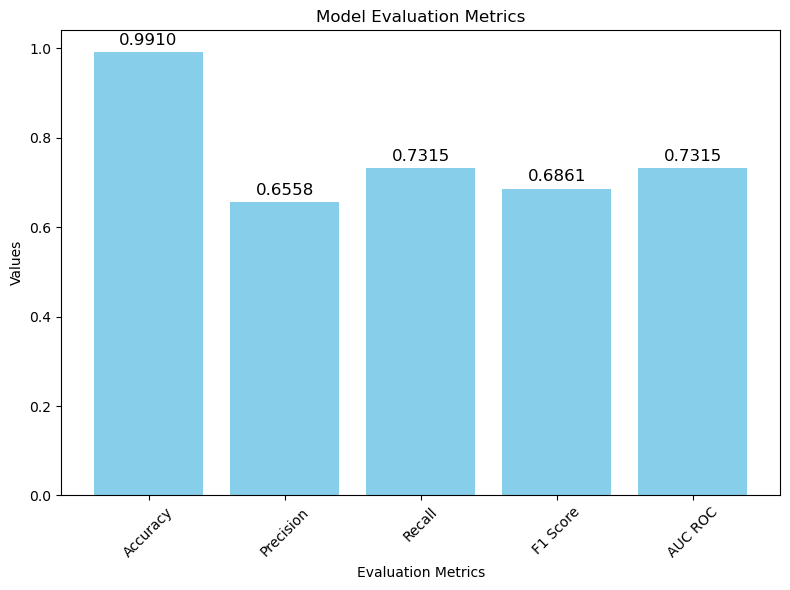

In [88]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

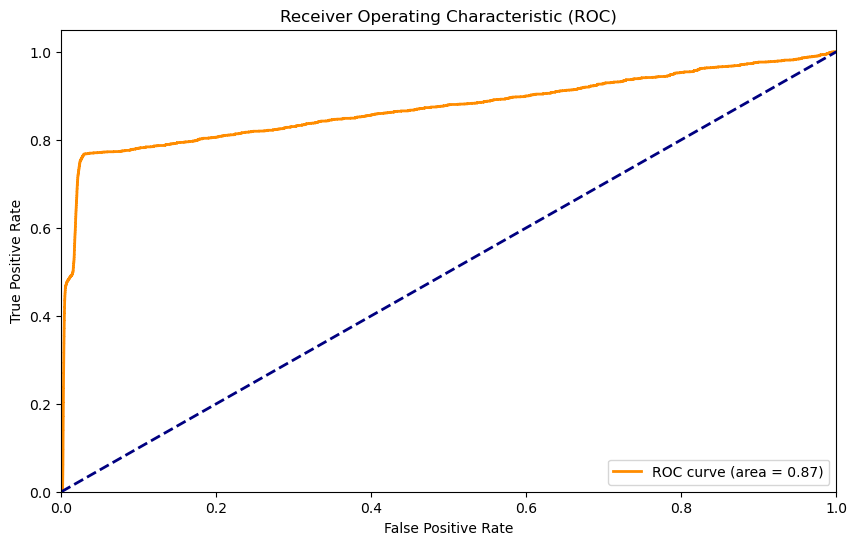

In [89]:
Plot_Auc_Roc_Curve(X_test, y_test)

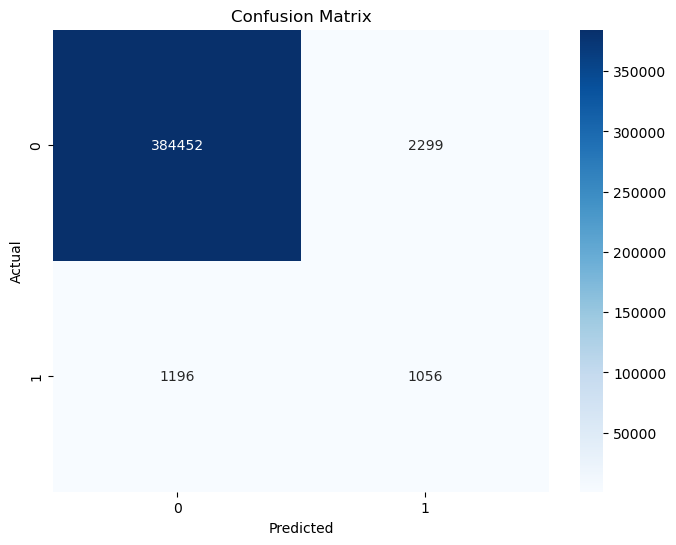

In [90]:
show_confusion_matrix(y_test, y_test_pred)